# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Загрузим и просмотрим данные:

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
df_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
df_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


У нас данные по 3 регионам, в каждом информация о 100 000 скважин, с объемом запасов и 3 скрытыми параметрами.
Пропущенных значений нет

Просмотрим статистики по каждому показателю:

In [9]:
df_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [10]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [11]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


В регионах 0 и 2 близки статистики продуктивности и признака f2, при этом существенное отличаются признаки f0 и f1  
Средняя продуктивность региона 1 в 1,5 ниже чем в других, статистики признаков существенно отличаются

Проверим наличие повторов скважин:

In [12]:
len(df_0['id'].unique())

99990

In [13]:
len(df_1['id'].unique())

99996

In [14]:
len(df_2['id'].unique())

99996

Из 10 000 строк 4 -10 не уникальны, этим можно пренебречь.  
Столбец с ID  нам не нужен для анализа и прогноза, удалим его:

In [15]:
df_0 = df_0.drop(['id'], axis = 1)
df_1 = df_1.drop(['id'], axis = 1)
df_2 = df_2.drop(['id'], axis = 1)

проверим результат:

In [16]:
df_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


Построим корреляциооные матрицы для каждого региона, чтобы проследить влияние признаков на продукт и друг на друга:

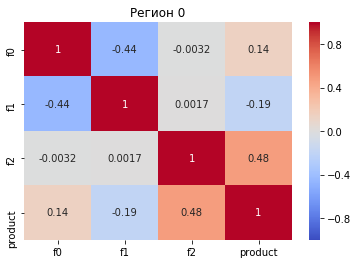

In [17]:
sns.heatmap(df_0.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Регион 0");

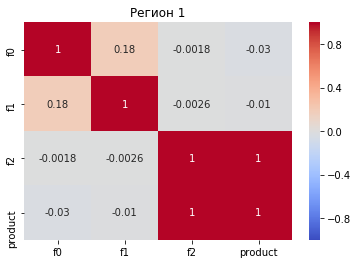

In [18]:
sns.heatmap(df_1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Регион 1");

In [19]:
df_1.corr(method ='pearson')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


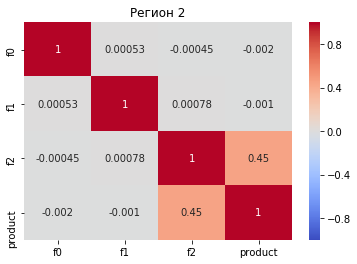

In [20]:
sns.heatmap(df_2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Регион 2");

В регионах 0 и 2, влияние признака f2 значительно, для региона 1 признак f2 играет почти определяющее значение с небольшим отклонением.  
Признаки f1 и f0 не влияют линейно на продуктивность скважин. Возможно зависимость носит нелинейный характер.  
Необходимо будет испытать модели включающую признаки f0, f1,  и исключающую их.

''

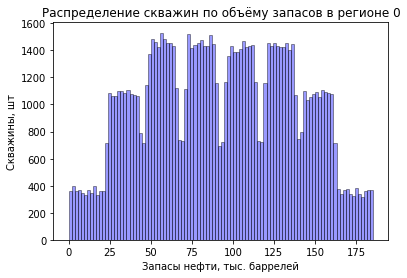

In [21]:
sns.distplot(df_0['product'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Распределение скважин по объёму запасов в регионе 0')
plt.ylabel('Скважины, шт')
plt.xlabel('Запасы нефти, тыс. баррелей')
;

''

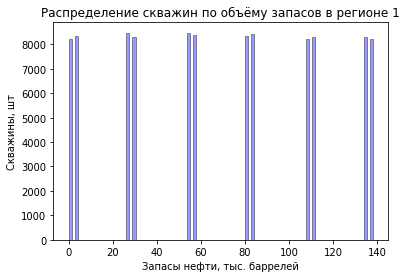

In [22]:
sns.distplot(df_1['product'], hist=True, kde=False,
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Распределение скважин по объёму запасов в регионе 1')
plt.ylabel('Скважины, шт')
plt.xlabel('Запасы нефти, тыс. баррелей')
;

''

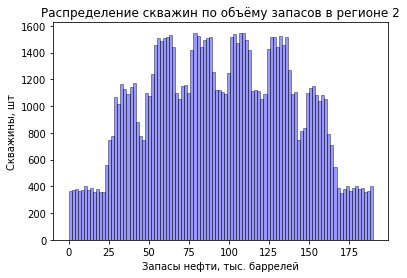

In [23]:
sns.distplot(df_2['product'], hist=True, kde=False,
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Распределение скважин по объёму запасов в регионе 2')
plt.ylabel('Скважины, шт')
plt.xlabel('Запасы нефти, тыс. баррелей')
;

Распределение скважин по запасам явно не нормальное. Можно выделить 6 явных вершин пиков в каждом регионе. Предполагаю, это свзано с неизвестными мне отраслевыми стандартами и с точностью современных методов оценки запасов нефти в скважине. В регионе 1 видимо скважину по умолчанию присваивают к одному из классов, а в других регионах учитываются дополнительные параметры.

### Вывод:

У нас данные по 3 регионам  
Регионах 0 и 2 близки по параметрам  
Средняя продуктивность региона 1 в 1,5 ниже чем в других, статистики признаков существенно отличаются  
Признак f2 имеет наибольшее вляние на продуктивность скважины  
Испытаем модели включающую признаки f0, f1, и исключающую их.  
Распределение скважин по запасам не нормальное.   

## Обучение и проверка модели

### Подготовим данные

Напишем функцию, которая будет разделять данные на обучающию и тестовую выборки со всеми признаками и только с признаком f2

In [24]:
def split(df):
    x = df.drop('product', axis=1)
    y = df['product']
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=0.75,random_state=42)
    x_train_f2 = x_train['f2'].values.reshape(-1,1)   
    x_test_f2 = x_test['f2'].values.reshape(-1,1)
    
    return x_train, x_test, x_train_f2, x_test_f2, y_train, y_test

Разделим данные по каждому региону

In [25]:
x_0_train, x_0_test, x_0_train_f2, x_0_test_f2,  y_0_train, y_0_test = split(df_0)

In [26]:
x_0_test.shape

(25000, 3)

In [27]:
x_1_train, x_1_test, x_1_train_f2, x_1_test_f2,  y_1_train, y_1_test = split(df_1)

In [28]:
x_1_train.shape

(75000, 3)

In [29]:
x_2_train, x_2_test, x_2_train_f2, x_2_test_f2,  y_2_train, y_2_test = split(df_2)

In [30]:
y_2_test.shape

(25000,)

### Масштабируем данные

In [31]:
def scaler(x_train,x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_s = scaler.transform(x_train)
    x_test_s = scaler.transform(x_test)
    return x_train_s, x_test_s

In [32]:
x_0_train, x_0_test = scaler(x_0_train, x_0_test)
x_1_train, x_1_test = scaler(x_1_train, x_1_test)
x_2_train, x_2_test = scaler(x_2_train, x_2_test)

### Линейная регрессия

Построим модель для каждого региона с учетом параметров f0 f1 и без учета, проверим предсказания модели средним квадратичным отклонением, для удобства напишем функцию:

In [33]:
def linear(x_train, x_test, x_train_f2, x_test_f2, y_train, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_test)
    predictions_valid = pd.Series(predictions_valid)
    pred_mean = predictions_valid.mean()
    result = mean_squared_error(y_test, predictions_valid)**0.5 
    
    model_f2 = LinearRegression()
    model_f2.fit(x_train_f2, y_train)
    predictions_valid_f2 = model_f2.predict(x_test_f2)
    predictions_valid_f2 = pd.Series(predictions_valid_f2)
    pred_mean_f2 = predictions_valid_f2.mean()
    result_f2 = mean_squared_error(y_test, predictions_valid_f2)**0.5 
    print('Средний запаc:',pred_mean,'RMSE:', result)
    print('Средний запаc f2:',pred_mean_f2,'RMSE f2:', result_f2)
    return pred_mean, result, pred_mean_f2, result_f2, predictions_valid    
    

Регион 0:

In [34]:
pred_mean_0, result_0, pred_mean_f2_0, result_f2_0, y_0_pred = linear(
    x_0_train, x_0_test, x_0_train_f2, x_0_test_f2,  y_0_train, y_0_test)

Средний запаc: 92.39879990657768 RMSE: 37.75660035026169
Средний запаc f2: 92.34937175741717 RMSE f2: 38.75148536710881


Регион 1:

In [35]:
pred_mean_1, result_1, pred_mean_f2_1, result_f2_1, y_1_pred = linear(
    x_1_train, x_1_test, x_1_train_f2, x_1_test_f2,  y_1_train, y_1_test)

Средний запаc: 68.71287803913762 RMSE: 0.8902801001028834
Средний запаc f2: 68.7212172926088 RMSE f2: 1.595175235376749


Регион 2:

In [36]:
pred_mean_2, result_2, pred_mean_f2_2, result_f2_2, y_2_pred = linear(
    x_2_train, x_2_test, x_2_train_f2, x_2_test_f2,  y_2_train, y_2_test)

Средний запаc: 94.77102387765939 RMSE: 40.145872311342174
Средний запаc f2: 94.7711306999486 RMSE f2: 40.145281273044134


### Вывод

Наилучший результат модель линейной регрессии показала по региону 1 с минимальным RMSE, что ожидаемо, учитывая корреляцию и распределение.  
По регионам 0 и 1 видно, что исключение признаков f0 f1 ухудшает прогноз, в регионе 2 не влияет на результат. В дальнейшем будем использовать все признаки.


## Подготовка к расчёту прибыли

In [37]:
BUDGET = 10000000000
REVENUE = 450000
WELLS = 200

Найдем минимальную средню продуктивность выбранных скважин в регионе.
Для этого бюджет разделим на количество скважин, получив среднюю минимальную прибыль со скважины, и разделим на прибыль с 1 тыс. барелей.

In [38]:
min_prod = BUDGET / REVENUE / WELLS
print(min_prod, 'тыс. баррелей')

111.11111111111111 тыс. баррелей


Как видим, это выше, чем средний показатель по любому из рассматриваемых регионов. 

Попробуем создать датафреймы для каждого региона, объединяющие предсказание модели и фактические данные, это мне поможет не запутаться в дальнейшем анализе

In [39]:
y_0 = pd.DataFrame(list(zip(y_0_pred, y_0_test)), columns = ['predict', 'target'])
y_1 = pd.DataFrame(list(zip(y_1_pred, y_1_test)), columns = ['predict', 'target'])
y_2 = pd.DataFrame(list(zip(y_2_pred, y_2_test)), columns = ['predict', 'target'])

In [40]:
y_0.head()

,predict,target
0,101.901017,122.073350
1,78.217774,48.738540
2,115.266901,131.338088
3,105.618618,88.327757
4,97.980185,36.959266


## Расчёт прибыли и рисков 

### Расчёт прибыли

Напишем функцию и расчитаем прибыль по каждому региону исходя из того, что буду выбраны 200 скважин с лучшим результатом

In [41]:
def profit(pred, y):
    pred_200 = pred.sort_values(ascending = False)[:WELLS]
    targ = y[pred_200.index].sum()
    prft = targ * REVENUE - BUDGET    
    return prft

### Расчёт рисков 

Необходимо оценить вероятность получения убытка и спрогнозировать среднюю прибыль, на которую можно расчитывать. Так так у нас распределение не нормальное, используем инструмент бутстреп

In [42]:
state = np.random.RandomState(42)

def bootstrap(fg):
    values = []
    pred = fg['predict'] 
    y = fg['target']
    losses = 0
    
    for i in range(1000):
        y_sample = y.sample(n = 500, replace = True, random_state = state)
        pred_sample = pred[y_sample.index]
        values.append(profit(pred_sample, y_sample))
        if profit(pred_sample, y_sample) < 0: losses += 1
        
    values = pd.Series(values)
    lower = values.quantile(0.025).astype(int)
    upper = values.quantile(0.975).astype(int)
    mean = values.mean().astype(int)
    probability_of_losses = losses / 10
    print('Прибыль от:',lower,'до', upper,'среднее:', mean, 'Риск убытка:', probability_of_losses, '%')
    return values, lower, upper, mean, probability_of_losses    

Регион 0

In [43]:
profit_0, lower_0, upper_0, profit_0_mean, prob_los_0 = bootstrap(y_0)

Прибыль от: 10089411 до 1246370980 среднее: 606122631 Риск убытка: 2.5 %


С вероятностью выше 97,5% прибыль выше 10 млн, убытка можно не бояться

''

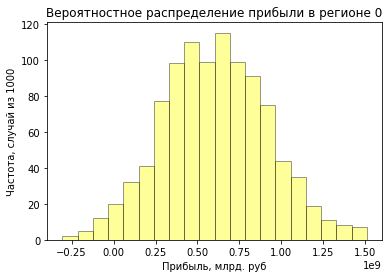

In [44]:
sns.distplot(profit_0, hist=True, kde=False,
             bins=20, color = 'yellow',
             hist_kws={'edgecolor':'black'})
plt.title('Вероятностное распределение прибыли в регионе 0')
plt.ylabel('Частота, случай из 1000')
plt.xlabel('Прибыль, млрд. руб')
;

Регион 1

In [45]:
profit_1, lower_1, upper_1, profit_1_mean, prob_los_1 = bootstrap(y_1)

Прибыль от: 148800010 до 1186977426 среднее: 662413205 Риск убытка: 0.3 %


Средняя прибыль в этом регионе выше уже 662 млн.руб, также с вероятностью 97,5% прибыль выше 148 млн. руб.

''

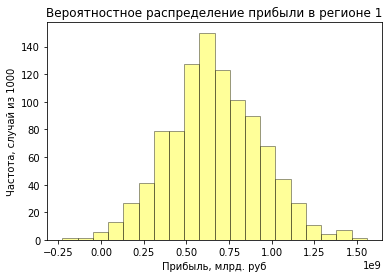

In [46]:
sns.distplot(profit_1, hist=True, kde=False,
             bins=20, color = 'yellow',
             hist_kws={'edgecolor':'black'})
plt.title('Вероятностное распределение прибыли в регионе 1')
plt.ylabel('Частота, случай из 1000')
plt.xlabel('Прибыль, млрд. руб')
;

In [47]:
profit_2, lower_2, upper_2, profit_2_mean, prob_los_2 = bootstrap(y_2)

Прибыль от: 2464800 до 1254827360 среднее: 592052020 Риск убытка: 2.5 %


Средняя прибыль в регионе самая низкая 592 млн. руб., при этом с вероятностью 2,5% можно получить результат ниже 2,4 млн. руб.

''

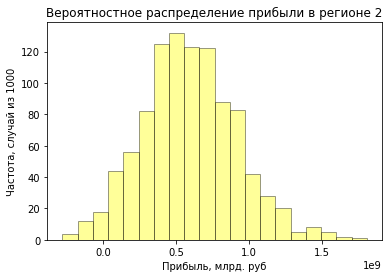

In [48]:
sns.distplot(profit_2, hist=True, kde=False,
             bins=20, color = 'yellow',
             hist_kws={'edgecolor':'black'})
plt.title('Вероятностное распределение прибыли в регионе 2')
plt.ylabel('Частота, случай из 1000')
plt.xlabel('Прибыль, млрд. руб')
;

In [49]:
res = pd.DataFrame([[lower_0, upper_0, profit_0_mean, prob_los_0],
                    [lower_1, upper_1, profit_1_mean, prob_los_1], 
                    [lower_2, upper_2, profit_2_mean, prob_los_2]], 
                   columns = ['Нижняя граница прибыли, руб.', 'Верхняя граница прибыли, руб.', 'Средняя прибыль, руб.', 'Вероятность убытков, %'],
                  index = ['Регион 0','Регион 1','Регион 2']
                  )

res

,"Нижняя граница прибыли, руб.","Верхняя граница прибыли, руб.","Средняя прибыль, руб.","Вероятность убытков, %"
Регион 0,10089411,1246370980,606122631,2.5
Регион 1,148800010,1186977426,662413205,0.3
Регион 2,2464800,1254827360,592052020,2.5


## Вывод

Мы загрузили данные о скважинах по трем регионам, увидели не нормальное распределение в каждом.  

Признак f2 оказывает наибольшее влияние на объем запасов скважины, в Регионе 1 определяющее.  
При этом результат работы моделей показал, что влияние прочих признаков также стоит учитывать.

После разбиения данных на тренировочну и тестовую выборку, мы построили по каждому региону модель линейной регрессии для предсказания запасов.
Проверка на тестовой выборке показала наилучшую эффективность модели для 3 го региона.  

Для вычисления вероятности получить наибольшую прибыль без большого риска убытка мы воспользовались бутстрепом, так как наше распределение не нормальное и другие методы не подходят.  

В итоге выяснилось, что вероятность получить убыток во всех 3 регионах ниже 2,5%.

Наибольшую среднюю потенциальную прибыль обеспечит бурение 200 скважин выбранных на основе нашей модели в Регионе 1.   

Выбираем Регион 1